# Multivariate Linear Regression
## Implementations:
- ### `Newton Method`
- ### `Matrix Equation`
- ### `Gradient Descent`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class LinearRegression:
    ALGORITHMS = ['newton', 'matrix_equation', 'gradient_descent']
    CONVERGENCE_THRESHOLD = 1.5e-8

    """
    n_iterations: float
        The number of iteration witch algorithm will perform for tuning weights, 
        this attribute works only for gradient_descent solver
    learning_rate: float
        The gradient decent step size, this attribute works only for gradient_descent solver
    solver: string
        The algorithm that will be used for training linear regression, list of available
        algorithms: ['newton', "matrix_equation", "gradient_descent"] 
    """

    def __init__(self, learning_rate=1.5e-11, n_iterations=1000, solver='newton'):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.cost_history = list()

        if solver in (LinearRegression.ALGORITHMS):
            self.solver = solver
        else:
            raise ValueError("Invalid value for 'solver' attribute: %s, 'solver' "
                             "should be in ['newton, 'matrix_equation', 'gradient_descent']" % solver)

    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1] + 1)

        X = np.array(X)
        y = np.array(y)

        # Add intercept as first column
        X = np.insert(X, 0, 1, axis=1)

        if self.solver == "matrix_equation":
            self.weights = self._solve_matrix_equation(X, y)

        elif self.solver == "newton":
            self.weights = self._solve_newton(X, y, self.weights)

        elif self.solver == "gradient_descent":
            self.weights = self._solve_gradient_descent(X, y, self.weights, self.learning_rate, self.n_iterations)

        else:
            raise ValueError("Unknown algorithm name")

    def predict(self, X):
        X = np.insert(np.array(X), 0, 1, axis=1)
        return X @ self.weights
    
    def _calculate_MSE(self, X, y, w, add_intercept=False):
        if add_intercept:
            X = np.insert(np.array(X), 0, 1, axis=1)

        MSE = np.mean((y - X @ w) ** 2)
        return MSE

    def _solve_matrix_equation(self, X, y):
        '''
             Classic formula for solving RSS (Residual Sum of Squares)
             RSS(w) = (y - X @ w).T @(y - X @ w)
        '''
        return np.linalg.pinv(X.T @ X) @ X.T @ y

    def _solve_newton(self, X, y, weights):
        w = weights
        cost_residual = float("inf")

        while (cost_residual > LinearRegression.CONVERGENCE_THRESHOLD):
            prev_cost = self._calculate_MSE(X, y, w)
            w = w - np.linalg.inv(self._hessian(X)) @ self._gradient(X, y, w)
            new_cost = self._calculate_MSE(X, y, w)

            cost_residual = abs(prev_cost - new_cost)

        return w

    def _solve_gradient_descent(self, X, y, weights, learning_rate=1.5e-11, n_iterations=1000):
        w = weights
        self.cost_history.append(self._calculate_MSE(X, y, w))
        for _ in range(n_iterations):
            w = w - learning_rate * self._gradient(X, y, w)
            self.cost_history.append(self._calculate_MSE(X, y, w))

        return w

    def _gradient(self, X, y, weights):
        '''Gradient vector from RSS'''
        m = len(X)
        return -2 * X.T @ (y - X @ weights)

    def _hessian(self, X):
        '''Hessian matrix from RSS'''
        m = len(X)
        return 2 * X.T @ X
    
    def get_coefficients(self):
        return self.weights
    
    def get_training_history(self):
        return self.cost_history

# Test implementation on sklearn `california_housing` data

In [20]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as SKLearnLinearRegression
from sklearn.metrics import mean_squared_error

In [21]:
X, y = fetch_california_housing(return_X_y=True, as_frame=True)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0 )

In [23]:
len(X_train), len(X_test)

(16512, 4128)

In [24]:
## Train custom model and compare with sklearn implementation.

In [25]:
# Train linear legression with Matrix Equation solever (custom model)
custom_lin_reg = LinearRegression(solver="matrix_equation")
custom_lin_reg.fit(X_train, y_train)

In [26]:
# Train linear regression sklearn model
sklearn_lin_reg = SKLearnLinearRegression()
sklearn_lin_reg.fit(X_train, y_train)

LinearRegression()

In [27]:
y_pred_custom = custom_lin_reg.predict(X_test)
y_pred_sklearn = sklearn_lin_reg.predict(X_test)

In [28]:
print("Custom model MSE:", mean_squared_error(y_test, y_pred_custom))
print("SKLearn model MSE:", mean_squared_error(y_test, y_pred_sklearn))

Custom model MSE: 0.5289841670593455
SKLearn model MSE: 0.5289841670367221


In [29]:
print("Custom model coefficients:", custom_lin_reg.get_coefficients())
print("SKLearn model coefficients:", sklearn_lin_reg.intercept_, sklearn_lin_reg.coef_)

Custom model coefficients: [-3.68585687e+01  4.33333407e-01  9.29324344e-03 -9.86433746e-02
  5.93215489e-01 -7.56192490e-06 -4.74516385e-03 -4.21449332e-01
 -4.34166037e-01]
SKLearn model coefficients: -36.85856910680125 [ 4.33333407e-01  9.29324337e-03 -9.86433739e-02  5.93215487e-01
 -7.56192502e-06 -4.74516383e-03 -4.21449336e-01 -4.34166041e-01]


## Check MSE for Newton Method implementation

In [30]:
# Train linear legression with Newton Medhod solver (custom model)
custom_lin_reg_newton = LinearRegression(solver="newton")
custom_lin_reg_newton.fit(X_train, y_train)

In [31]:
y_pred_custom_newton = custom_lin_reg_newton.predict(X_test)

In [32]:
print("Custom model Newton Method MSE:", mean_squared_error(y_test, y_pred_custom_newton))
print("SKLearn model MSE:", mean_squared_error(y_test, y_pred_sklearn))

Custom model Newton Method MSE: 0.5289841670367209
SKLearn model MSE: 0.5289841670367221


## Last but not least simple gradient descent approach 

In [33]:
# Train linear legression with Newton Medhod solver (custom model)
custom_lin_reg_grad_desc = LinearRegression(solver="gradient_descent", learning_rate = 1.7e-11, n_iterations=1000)
custom_lin_reg_grad_desc.fit(X_train, y_train)

In [34]:
y_pred_custom_grad_desc = custom_lin_reg_grad_desc.predict(X_test)

In [35]:
print("Custom model Gradient Descent MSE:", mean_squared_error(y_test, y_pred_custom_grad_desc))
print("SKLearn model MSE:", mean_squared_error(y_test, y_pred_sklearn))

Custom model Gradient Descent MSE: 1.2915521855179877
SKLearn model MSE: 0.5289841670367221


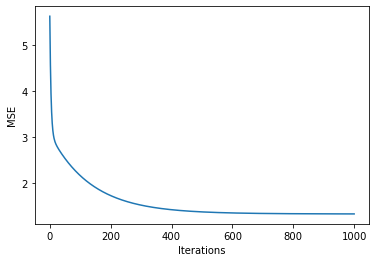

In [36]:
## Check that the MSE decreases at each iteration
plt.plot(custom_lin_reg_grad_desc.get_training_history())
plt.ylabel('MSE')
plt.xlabel('Iterations');